In [4]:
import matplotlib.pyplot as plt
from circuits_benchmark.utils.get_cases import get_cases
from circuits_benchmark.utils.iit import make_iit_hl_model, make_ll_cfg
from circuits_benchmark.transformers.hooked_tracr_transformer import HookedTracrTransformer
from circuits_benchmark.utils.iit.wandb_loader import load_model_from_wandb
import torch

case = 3
case = get_cases(indices=[str(case)])[0]


tracr_model = case.get_tl_model()
hl_model = make_iit_hl_model(tracr_model)
output_dir = "results/rough_dump/"
def load_iit_model(weight):
    ll_cfg = make_ll_cfg(hl_model)
    ll_model = HookedTracrTransformer(
        ll_cfg,
        hl_model.tracr_input_encoder,
        hl_model.tracr_output_encoder,
        hl_model.residual_stream_labels,
        remove_extra_tensor_cloning=True,
    )
    load_model_from_wandb(case.get_index(), weight, output_dir)

    ll_model.load_state_dict(torch.load(output_dir + f"ll_models/{case.get_index()}/ll_model_{weight}.pth"))
    return ll_model

ll_model_100 = load_iit_model("100")
ll_model_510 = load_iit_model("510")

Moving model to device:  cpu
Moving model to device:  cpu


In [10]:
ll_model_100.blocks[0].attn.W_Q

Parameter containing:
tensor([[[ 0.0337, -0.0874,  0.0083],
         [-0.2980, -0.0601, -0.2817],
         [ 0.3159,  0.1074, -0.0904],
         [-0.4315,  0.2051, -0.2326],
         [ 0.3154,  0.1239, -0.2365],
         [ 0.5072,  0.1454,  0.2990],
         [ 0.4299,  0.1788,  0.2926],
         [-0.5579,  0.2423,  0.1735],
         [-0.0392, -0.2477, -0.3400],
         [-0.1945,  0.2484, -0.0529],
         [ 0.3671,  0.2370,  0.0669],
         [ 0.2072, -0.0951,  0.1415]],

        [[-0.2559, -0.3116, -0.1450],
         [-0.2844,  0.1092, -0.3055],
         [ 0.2836, -0.1349, -0.1444],
         [-0.2176,  0.0751, -0.2130],
         [-0.2780,  0.2174, -0.0488],
         [-0.0865,  0.2795,  0.0696],
         [ 0.4424,  0.0486,  0.1356],
         [ 0.0463, -0.1119, -0.0375],
         [ 0.1296, -0.1893,  0.5359],
         [ 0.1754, -0.0817,  0.1450],
         [-0.0030, -0.3474, -0.1086],
         [ 0.5129, -0.2671, -0.0033]],

        [[-0.0334,  0.0713,  0.2794],
         [-0.4299, -0.19

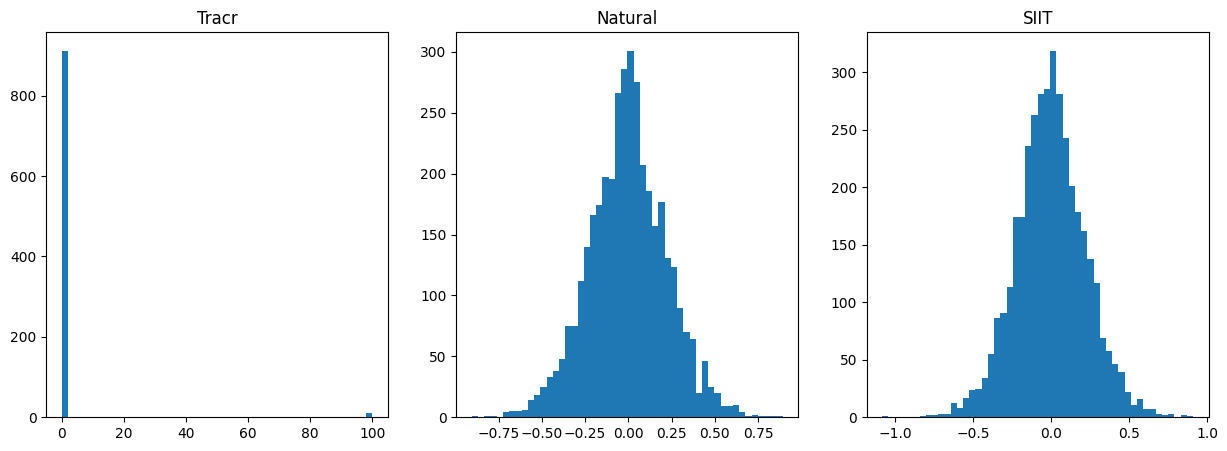

In [35]:
def plot_attention_head(tracr_model, ll_model_100, ll_model_510, head):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    labels = ["Tracr", "Natural", "SIIT"]
    for i, model in enumerate([tracr_model, ll_model_100, ll_model_510]):
        all_param_list = list(model.parameters())
        # # flatten all parameters
        all_param_list = [p.flatten() for p in all_param_list]
        all_param_list = torch.cat(all_param_list).detach().numpy()


        # all_param_list = model.blocks[0].attn.W_Q.flatten().detach().numpy()
        # all_param_list = model.blocks[0].mlp.W_out.flatten().detach().numpy()


        # plot histogram
        axs[i].hist(all_param_list, bins=50)
        axs[i].set_title(labels[i])
        # set color of histogram
        axs[i].set_facecolor('white')
    plt.show()

plot_attention_head(tracr_model, ll_model_100, ll_model_510, 0)